In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, SimpleRNN, Bidirectional, Dense, Dropout

In [ ]:
# Load the raw IMDB dataset
df = pd.read_csv("/content/IMDB Dataset.csv")

print(df.head())
print(df['sentiment'].value_counts())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [ ]:
# Convert sentiment to numeric (1 = positive, 0 = negative)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

#text cleaning
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", " ", text)
    text = re.sub(r"[^a-zA-Z']", " ", text)
    text = re.sub(r"\s+", " ", text).strip() # remove extra spaces
    return text

df['review'] = df['review'].apply(clean_text)

print(df.sample(3))

                                                  review  sentiment
7389   i must say when i saw this film at a on this s...          0
25969  first off the alien saves a little black boy a...          1
31382  first off this movie is not near complete my g...          0


In [ ]:
# Hyperparameters
vocab_size = 20000    # number of unique words to keep
max_len = 200          # max sequence length
oov_token = "<UNK>"

# Initialize tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(df['review'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['review'])

# Pad sequences
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, df['sentiment'].values, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 40000
Testing samples: 10000


In [ ]:
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_len),
    Bidirectional(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, max_len))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,642,305 (10.08 MB)

 Trainable params: 2,642,305 (10.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.4990 - loss: 0.7233 - val_accuracy: 0.4967 - val_loss: 0.7045
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.4997 - loss: 0.7035 - val_accuracy: 0.4924 - val_loss: 0.6948
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.4999 - loss: 0.7014 - val_accuracy: 0.4992 - val_loss: 0.7031
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.5090 - loss: 0.6969 - val_accuracy: 0.5036 - val_loss: 0.6933
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.4981 - loss: 0.6954 - val_accuracy: 0.5023 - val_loss: 0.6932
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.5052 - loss: 0.6941 - val_accuracy: 0.5140 - val_loss: 0.6933
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.4994 - loss: 0.6938 - val_accuracy: 0.5134 - val_loss: 0.6940
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.5084 - loss: 0.6934 - val_ac

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4993 - loss: 0.6935
Test Accuracy: 0.5012000203132629


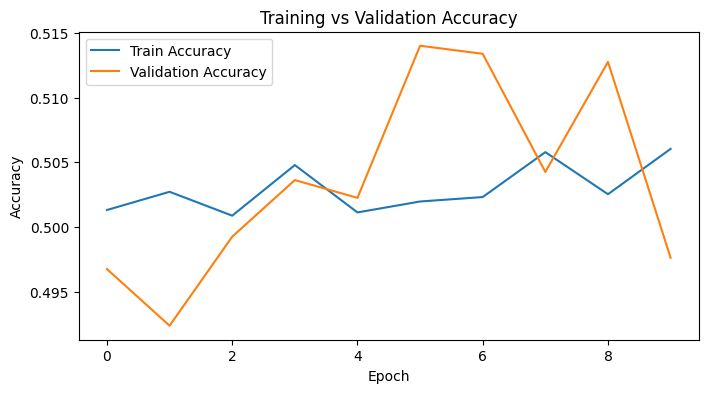

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
def predict_sentiment(review):
    seq = tokenizer.texts_to_sequences([review])
    pad = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')
    pred = model.predict(pad)[0][0]
    sentiment = "Positive 😊" if pred > 0.5 else "Negative 😞"
    print(f"\nReview: {review}")
    print(f"Predicted Sentiment: {sentiment}")

# 🔍 Try a few examples
predict_sentiment("The movie was absolutely wonderful and emotional")
predict_sentiment("I hated every second of this boring movie")
predict_sentiment("The plot was average but the cinematography was great")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step

Review: The movie was absolutely wonderful and emotional
Predicted Sentiment: Negative 😞
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Review: I hated every second of this boring movie
Predicted Sentiment: Positive 😊
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Review: The plot was average but the cinematography was great
Predicted Sentiment: Positive 😊


In [ ]:
predict_sentiment("It was boring and poorly acted")
predict_sentiment("The film was okay but could have been better")
predict_sentiment("The movie was amazing and full of emotion")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step

Review: It was boring and poorly acted
Predicted Sentiment: Positive 😊
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Review: The film was okay but could have been better
Predicted Sentiment: Negative 😞
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Review: The movie was amazing and full of emotion
Predicted Sentiment: Negative 😞


In [ ]:
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_len),
    Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.build(input_shape=(None, max_len))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 256)            │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,839,681 (10.83 MB)

 Trainable params: 2,839,681 (10.83 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 185s 708ms/step - accuracy: 0.6578 - loss: 0.5982 - val_accuracy: 0.7794 - val_loss: 0.4793
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 178s 712ms/step - accuracy: 0.8409 - loss: 0.3922 - val_accuracy: 0.7410 - val_loss: 0.5168
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 177s 710ms/step - accuracy: 0.8585 - loss: 0.3506 - val_accuracy: 0.8145 - val_loss: 0.4264
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 177s 705ms/step - accuracy: 0.9010 - loss: 0.2671 - val_accuracy: 0.8525 - val_loss: 0.3866
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 183s 733ms/step - accuracy: 0.9157 - loss: 0.2347 - val_accuracy: 0.8397 - val_loss: 0.4115
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 175s 701ms/step - accuracy: 0.9358 - loss: 0.1818 - val_accuracy: 0.8336 - val_loss: 0.4220
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 177s 708ms/step - accuracy: 0.9485 - loss: 0.1495 - val_accuracy: 0.8447 - val_loss: 0.5603
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 175s 702ms/step - accuracy: 0.9591 -

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 95s 303ms/step - accuracy: 0.8496 - loss: 0.5357
Test Accuracy: 0.8510000109672546


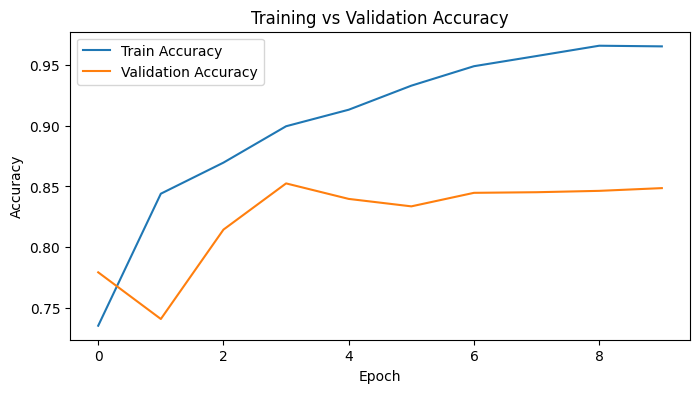

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
def predict_sentiment(review):
    seq = tokenizer.texts_to_sequences([review])
    pad = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')
    pred = model.predict(pad)[0][0]
    sentiment = "Positive 😊" if pred > 0.5 else "Negative 😞"
    print(f"\nReview: {review}")
    print(f"Predicted Sentiment: {sentiment}")

# 🔍 Try a few examples
predict_sentiment("The movie was absolutely wonderful and emotional")
predict_sentiment("I hated every second of this boring movie")
predict_sentiment("The plot was average but the cinematography was great")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Review: The movie was absolutely wonderful and emotional
Predicted Sentiment: Positive 😊
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step

Review: I hated every second of this boring movie
Predicted Sentiment: Negative 😞
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step

Review: The plot was average but the cinematography was great
Predicted Sentiment: Negative 😞


In [ ]:
predict_sentiment("It was boring and poorly acted")
predict_sentiment("The film was okay but could have been better")
predict_sentiment("The movie was amazing and full of emotion")
predict_sentiment("I loved the characters and the plot was gripping from start to finish.")
predict_sentiment("The pacing was slow, and the humor fell flat, making it hard to stay interested.")
predict_sentiment("The film was too predictable and lacked any real emotional depth")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step

Review: It was boring and poorly acted
Predicted Sentiment: Negative 😞
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step

Review: The film was okay but could have been better
Predicted Sentiment: Negative 😞
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step

Review: The movie was amazing and full of emotion
Predicted Sentiment: Positive 😊
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step

Review: I loved the characters and the plot was gripping from start to finish.
Predicted Sentiment: Positive 😊
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step

Review: The pacing was slow, and the humor fell flat, making it hard to stay interested.
Predicted Sentiment: Negative 😞
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step

Review: The film was too predictable and lacked any real emotional depth
Predicted Sentiment: Negative 😞


In [ ]:
from tensorflow.keras.layers import GRU, Bidirectional

model_gru = Sequential([
    Embedding(vocab_size, 128, input_length=max_len),
    Bidirectional(GRU(128, dropout=0.2, recurrent_dropout=0.2)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.build(input_shape=(None, max_len))
model_gru.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 200, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 256)            │       198,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,774,657 (10.58 MB)

 Trainable params: 2,774,657 (10.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model_gru.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 198s 771ms/step - accuracy: 0.6153 - loss: 0.6271 - val_accuracy: 0.8278 - val_loss: 0.3916
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 171s 686ms/step - accuracy: 0.8197 - loss: 0.4178 - val_accuracy: 0.7330 - val_loss: 0.5235
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 171s 684ms/step - accuracy: 0.8186 - loss: 0.4132 - val_accuracy: 0.8385 - val_loss: 0.3821
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 171s 684ms/step - accuracy: 0.9022 - loss: 0.2589 - val_accuracy: 0.8415 - val_loss: 0.3965
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 171s 684ms/step - accuracy: 0.9335 - loss: 0.1855 - val_accuracy: 0.8422 - val_loss: 0.4187
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 173s 691ms/step - accuracy: 0.9535 - loss: 0.1357 - val_accuracy: 0.8359 - val_loss: 0.4664
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 171s 682ms/step - accuracy: 0.9671 - loss: 0.0997 - val_accuracy: 0.8366 - val_loss: 0.5465
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 170s 681ms/step - accuracy: 0.9772 -

In [ ]:
loss, acc = model_gru.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 64s 206ms/step - accuracy: 0.8333 - loss: 0.7550
Test Accuracy: 0.8378000259399414


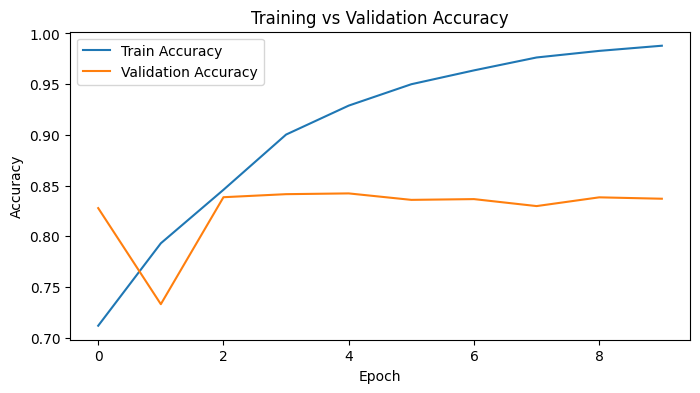

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
def predict_sentiment(review):
    seq = tokenizer.texts_to_sequences([review])
    pad = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')
    pred = model_gru.predict(pad)[0][0]
    sentiment = "Positive 😊" if pred > 0.5 else "Negative 😞"
    print(f"\nReview: {review}")
    print(f"Predicted Sentiment: {sentiment}")

# 🔍 Try a few examples
predict_sentiment("The movie was absolutely wonderful and emotional")
predict_sentiment("I hated every second of this boring movie")
predict_sentiment("The plot was average but the cinematography was great")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 847ms/step

Review: The movie was absolutely wonderful and emotional
Predicted Sentiment: Positive 😊
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step

Review: I hated every second of this boring movie
Predicted Sentiment: Negative 😞
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step

Review: The plot was average but the cinematography was great
Predicted Sentiment: Positive 😊


In [ ]:
predict_sentiment("It was boring and poorly acted")
predict_sentiment("The film was okay but could have been better")
predict_sentiment("The movie was amazing and full of emotion")
predict_sentiment("I loved the characters and the plot was gripping from start to finish.")
predict_sentiment("The pacing was slow, and the humor fell flat, making it hard to stay interested.")
predict_sentiment("The film was too predictable and lacked any real emotional depth")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step

Review: It was boring and poorly acted
Predicted Sentiment: Negative 😞
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step

Review: The film was okay but could have been better
Predicted Sentiment: Negative 😞
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step

Review: The movie was amazing and full of emotion
Predicted Sentiment: Positive 😊
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step

Review: I loved the characters and the plot was gripping from start to finish.
Predicted Sentiment: Positive 😊
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step

Review: The pacing was slow, and the humor fell flat, making it hard to stay interested.
Predicted Sentiment: Negative 😞
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step

Review: The film was too predictable and lacked any real emotional depth
Predicted Sentiment: Negative 😞


In [ ]:
# ===== DistilBERT Fine-tuning =====
!pip install -q transformers

from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import pandas as pd

# ------------------------------
# 1️⃣ Load pretrained tokenizer
# ------------------------------
MODEL_NAME = "distilbert-base-uncased"
tokenizer_distil = DistilBertTokenizerFast.from_pretrained(MODEL_NAME)

# ------------------------------
# 2️⃣ Prepare IMDB dataset
# ------------------------------
texts = df['review'].tolist()
labels = df['sentiment'].values

texts_train, texts_val, y_train_tf, y_val_tf = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

# ------------------------------
# 3️⃣ Tokenize data
# ------------------------------
MAX_LEN_BERT = 128

train_encodings = tokenizer_distil(
    texts_train,
    truncation=True,
    padding='max_length',
    max_length=MAX_LEN_BERT,
    return_tensors='tf'
)
val_encodings = tokenizer_distil(
    texts_val,
    truncation=True,
    padding='max_length',
    max_length=MAX_LEN_BERT,
    return_tensors='tf'
)

# Convert to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train_tf
)).shuffle(10000).batch(16)

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    y_val_tf
)).batch(32)


In [ ]:
# ===== Fixed DistilBERT training cell =====
from transformers import TFDistilBertForSequenceClassification, create_optimizer

distil_model = TFDistilBertForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=2,
    from_pt=True
)

# Optimizer (HF helper)
batch_size = 16
num_train_steps = len(train_dataset) * 3
optimizer, lr_schedule = create_optimizer(
    init_lr=3e-5,
    num_train_steps=num_train_steps,
    num_warmup_steps=int(0.1 * num_train_steps),
)
distil_model.compile(optimizer=optimizer, metrics=['accuracy'])

# ✅ Datasets with explicit "labels" field fix the NoneType error
train_dataset = tf.data.Dataset.from_tensor_slices({
    **train_encodings,
    "labels": y_train_tf
}).shuffle(10000).batch(16)

val_dataset = tf.data.Dataset.from_tensor_slices({
    **val_encodings,
    "labels": y_val_tf
}).batch(32)

# Train safely
history_distil = distil_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=3
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'cla

Epoch 1/3
2500/2500 [==============================] - 639s 244ms/step - loss: 0.3425 - accuracy: 0.8436 - val_loss: 0.2585 - val_accuracy: 0.8919
Epoch 2/3
2500/2500 [==============================] - 595s 238ms/step - loss: 0.1882 - accuracy: 0.9255 - val_loss: 0.2660 - val_accuracy: 0.8990
Epoch 3/3
2500/2500 [==============================] - 592s 237ms/step - loss: 0.0784 - accuracy: 0.9744 - val_loss: 0.3562 - val_accuracy: 0.8960


In [ ]:
# ===== Evaluation =====
loss, acc = distil_model.evaluate(val_dataset)
print(f"✅ DistilBERT Validation Accuracy: {acc:.4f}")

313/313 [==============================] - 51s 162ms/step - loss: 0.3562 - accuracy: 0.8960
✅ DistilBERT Validation Accuracy: 0.8960


In [ ]:
# ===== Prediction =====
def predict_with_distilbert(text):
    enc = tokenizer_distil(
        [text], truncation=True, padding='max_length', max_length=MAX_LEN_BERT, return_tensors='tf'
    )
    logits = distil_model(enc)[0]
    probs = tf.nn.softmax(logits, axis=-1).numpy()[0]
    pred_label = np.argmax(probs)
    sentiment = "Positive 😊" if pred_label == 1 else "Negative 😞"
    print(f"\nReview: {text}\nPredicted Sentiment: {sentiment}\nConfidence: {probs[pred_label]:.3f}")

# Test a few
predict_with_distilbert("The movie was absolutely wonderful and emotional")
predict_with_distilbert("I hated every second of this boring movie")
predict_with_distilbert("The plot was average but the cinematography was great")


Review: The movie was absolutely wonderful and emotional
Predicted Sentiment: Positive 😊
Confidence: 0.998

Review: I hated every second of this boring movie
Predicted Sentiment: Negative 😞
Confidence: 0.999

Review: The plot was average but the cinematography was great
Predicted Sentiment: Positive 😊
Confidence: 0.764


In [ ]:
predict_with_distilbert("It was boring and poorly acted")
predict_with_distilbert("The film was okay but could have been better")
predict_with_distilbert("The movie was amazing and full of emotion")
predict_with_distilbert("I loved the characters and the plot was gripping from start to finish.")
predict_with_distilbert("The pacing was slow, and the humor fell flat, making it hard to stay interested.")
predict_with_distilbert("The film was too predictable and lacked any real emotional depth")


Review: It was boring and poorly acted
Predicted Sentiment: Negative 😞
Confidence: 0.996

Review: The film was okay but could have been better
Predicted Sentiment: Negative 😞
Confidence: 0.856

Review: The movie was amazing and full of emotion
Predicted Sentiment: Positive 😊
Confidence: 0.998

Review: I loved the characters and the plot was gripping from start to finish.
Predicted Sentiment: Positive 😊
Confidence: 0.998

Review: The pacing was slow, and the humor fell flat, making it hard to stay interested.
Predicted Sentiment: Negative 😞
Confidence: 0.995

Review: The film was too predictable and lacked any real emotional depth
Predicted Sentiment: Negative 😞
Confidence: 0.998


In [ ]:
predict_with_distilbert("The movie had some visually stunning moments, but the storyline just didn’t grab me. It felt like it was trying too hard to be deep.")
predict_with_distilbert("There were some interesting concepts here, but they were never fully explored. Still, I found myself intrigued throughout.")
predict_with_distilbert("It had all the right ingredients: great actors, an exciting premise, but the execution just didn't live up to expectations.")


Review: The movie had some visually stunning moments, but the storyline just didn’t grab me. It felt like it was trying too hard to be deep.
Predicted Sentiment: Negative 😞
Confidence: 0.998

Review: There were some interesting concepts here, but they were never fully explored. Still, I found myself intrigued throughout.
Predicted Sentiment: Positive 😊
Confidence: 0.986

Review: It had all the right ingredients: great actors, an exciting premise, but the execution just didn't live up to expectations.
Predicted Sentiment: Negative 😞
Confidence: 0.996


In [ ]:
# ===== Save fine-tuned DistilBERT model =====
distil_model.save_pretrained("distilbert_imdb_model")
tokenizer_distil.save_pretrained("distilbert_imdb_tokenizer")

print("✅ Model and tokenizer saved successfully!")

✅ Model and tokenizer saved successfully!


In [ ]:
!zip -r distilbert_imdb_model.zip distilbert_imdb_model
!zip -r distilbert_imdb_tokenizer.zip distilbert_imdb_tokenizer

from google.colab import files
files.download("distilbert_imdb_model.zip")
files.download("distilbert_imdb_tokenizer.zip")

  adding: distilbert_imdb_model/ (stored 0%)
  adding: distilbert_imdb_model/config.json (deflated 42%)
  adding: distilbert_imdb_model/tf_model.h5 (deflated 8%)
  adding: distilbert_imdb_tokenizer/ (stored 0%)
  adding: distilbert_imdb_tokenizer/special_tokens_map.json (deflated 42%)
  adding: distilbert_imdb_tokenizer/vocab.txt (deflated 53%)
  adding: distilbert_imdb_tokenizer/tokenizer.json (deflated 71%)
  adding: distilbert_imdb_tokenizer/tokenizer_config.json (deflated 75%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>